## Problem 1
## In this example, we will verify the accuracy of classification of newswires with different numbers of epochs and at the end we will add L2 regularization

In [2]:
import keras
keras.__version__

'2.1.4'

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)

In [521]:
train_labels.shape

(8982,)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

## Preparing the data
We can vectorize the data with the exact same code as in our previous example:

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building our network

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Testing with epochs=6

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=6,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/6
7982/7982 [==============================] - 2s 301us/step - loss: 2.8077 - acc: 0.5130 - val_loss: 1.8922 - val_acc: 0.6150
Epoch 2/6
7982/7982 [==============================] - 2s 247us/step - loss: 1.6439 - acc: 0.6561 - val_loss: 1.4405 - val_acc: 0.6830
Epoch 3/6
7982/7982 [==============================] - 2s 249us/step - loss: 1.3371 - acc: 0.7075 - val_loss: 1.2767 - val_acc: 0.7020
Epoch 4/6
7982/7982 [==============================] - 2s 247us/step - loss: 1.1721 - acc: 0.7412 - val_loss: 1.1785 - val_acc: 0.7320
Epoch 5/6
7982/7982 [==============================] - 2s 249us/step - loss: 1.0513 - acc: 0.7679 - val_loss: 1.0987 - val_acc: 0.7550
Epoch 6/6
2246/2246 [==============================] - 1s 230us/step


In [26]:
results

[1.121917981073884, 0.7493321460639379]

We can see an accuracy of 74%

## Testing with epochs=8

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 3s 328us/step - loss: 2.8042 - acc: 0.5163 - val_loss: 1.9094 - val_acc: 0.6200
Epoch 2/8
7982/7982 [==============================] - 2s 250us/step - loss: 1.6251 - acc: 0.6642 - val_loss: 1.4332 - val_acc: 0.6820
Epoch 3/8
7982/7982 [==============================] - 2s 245us/step - loss: 1.3168 - acc: 0.7144 - val_loss: 1.2582 - val_acc: 0.7190
Epoch 4/8
7982/7982 [==============================] - 2s 250us/step - loss: 1.1653 - acc: 0.7444 - val_loss: 1.1953 - val_acc: 0.7230
Epoch 5/8
7982/7982 [==============================] - 2s 247us/step - loss: 1.0560 - acc: 0.7645 - val_loss: 1.1173 - val_acc: 0.7490
Epoch 6/8
7982/7982 [==============================] - 2s 247us/step - loss: 0.9583 - acc: 0.7838 - val_loss: 1.0666 - val_acc: 0.7550
Epoch 7/8
7982/7982 [==============================] - ETA: 0s - loss: 0.8805 - acc: 0.796 - 2s 251us/step - loss: 0.8810 - acc: 0.7970 - val_

In [42]:
results

[1.0605277361237142, 0.7537845057880677]

We can see an accuracy of 75%

## Testing with epochs=10

In [167]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 4s 535us/step - loss: 2.7227 - acc: 0.4669 - val_loss: 1.8889 - val_acc: 0.6210
Epoch 2/10
7982/7982 [==============================] - 2s 294us/step - loss: 1.6459 - acc: 0.6636 - val_loss: 1.4596 - val_acc: 0.6800
Epoch 3/10
7982/7982 [==============================] - 2s 294us/step - loss: 1.3536 - acc: 0.7058 - val_loss: 1.2967 - val_acc: 0.7170
Epoch 4/10
7982/7982 [==============================] - 2s 291us/step - loss: 1.1852 - acc: 0.7424 - val_loss: 1.1776 - val_acc: 0.7430
Epoch 5/10
7982/7982 [==============================] - 2s 295us/step - loss: 1.0642 - acc: 0.7657 - val_loss: 1.1338 - val_acc: 0.7530
Epoch 6/10
7982/7982 [==============================] - 2s 313us/step - loss: 0.9685 - acc: 0.7843 - val_loss: 1.0636 - val_acc: 0.7650
Epoch 7/10
7982/7982 [==============================] - 2s 296us/step - loss: 0.8840 - acc: 0.7979 - val_loss: 1.0171 - val_acc: 0.7690


In [59]:
results

[0.9808251796189101, 0.7680320569902048]

We can see an accuracy of 76%

## Testing with epochs=15

In [65]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=15,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 3s 361us/step - loss: 2.6354 - acc: 0.4432 - val_loss: 1.7986 - val_acc: 0.6210
Epoch 2/15
7982/7982 [==============================] - 2s 255us/step - loss: 1.5796 - acc: 0.6656 - val_loss: 1.4213 - val_acc: 0.6930
Epoch 3/15
7982/7982 [==============================] - 2s 252us/step - loss: 1.3090 - acc: 0.7147 - val_loss: 1.2752 - val_acc: 0.7200
Epoch 4/15
7982/7982 [==============================] - 2s 261us/step - loss: 1.1580 - acc: 0.7409 - val_loss: 1.1757 - val_acc: 0.7340
Epoch 5/15
7982/7982 [==============================] - 2s 252us/step - loss: 1.0399 - acc: 0.7617 - val_loss: 1.1430 - val_acc: 0.7460
Epoch 6/15
7982/7982 [==============================] - 2s 252us/step - loss: 0.9489 - acc: 0.7840 - val_loss: 1.0761 - val_acc: 0.7550
Epoch 7/15
7982/7982 [==============================] - 2s 251us/step - loss: 0.8655 - acc: 0.7995 - val_loss: 1.0276 - val_acc: 0.7710


In [66]:
results

[0.9950239666847915, 0.7662511130899377]

We can also see an accuracy of 76%

## Testing with epochs=20

In [375]:
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=512,
              validation_data=(x_val, y_val))
    results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 710us/step - loss: 2.9491 - acc: 0.5085 - val_loss: 2.0301 - val_acc: 0.6220
Epoch 2/20
7982/7982 [==============================] - 2s 285us/step - loss: 1.6883 - acc: 0.6641 - val_loss: 1.4710 - val_acc: 0.6780
Epoch 3/20
7982/7982 [==============================] - 2s 267us/step - loss: 1.3228 - acc: 0.7184 - val_loss: 1.2595 - val_acc: 0.7230
Epoch 4/20
7982/7982 [==============================] - 2s 270us/step - loss: 1.1424 - acc: 0.7498 - val_loss: 1.1707 - val_acc: 0.7410
Epoch 5/20
7982/7982 [==============================] - 2s 260us/step - loss: 1.0263 - acc: 0.7700 - val_loss: 1.0866 - val_acc: 0.7590
Epoch 6/20
7982/7982 [==============================] - 2s 265us/step - loss: 0.9283 - acc: 0.7908 - val_loss: 1.0533 - val_acc: 0.7630
Epoch 7/20
7982/7982 [==============================] - 2s 265us/step - loss: 0.8544 - acc: 0.8034 - val_loss: 1.0076 - val_acc: 0.7790


In [376]:
results

[0.9904016764803009, 0.7773820124666073]

We can see an accuracy of 77%

We can consider that 10 epochs is an optimal number to produce the maximum accuracy, if we increase the number of epochs the result will be always around 76%.

## Problem 2

## Definition of parameters:

In [529]:
import numpy as np

all_scores = []
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Calculation of K-fold validation:

In [540]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

for i in range(k):
    print('processing fold #', i)
    model = build_model()
    
    model.fit(x_train[train_index], one_hot_train_labels[train_index], epochs=num_epochs, batch_size=512)    
    results, results2 = model.evaluate(x_test, one_hot_test_labels)
    all_scores.append(results2)

processing fold # 0
Epoch 1/10
1135/1135 [==============================] - 6s 5ms/step - loss: 3.8020 - acc: 0.1278
Epoch 2/10
1135/1135 [==============================] - 0s 320us/step - loss: 3.4010 - acc: 0.5304
Epoch 3/10
1135/1135 [==============================] - 0s 328us/step - loss: 2.9204 - acc: 0.5524
Epoch 4/10
1135/1135 [==============================] - 0s 329us/step - loss: 2.5172 - acc: 0.5841
Epoch 5/10
1135/1135 [==============================] - 0s 369us/step - loss: 2.2045 - acc: 0.6053
Epoch 6/10
1135/1135 [==============================] - 0s 373us/step - loss: 1.9484 - acc: 0.6344
Epoch 7/10
1135/1135 [==============================] - 0s 333us/step - loss: 1.7507 - acc: 0.6590
Epoch 8/10
1135/1135 [==============================] - 0s 332us/step - loss: 1.5983 - acc: 0.6722
Epoch 9/10
1135/1135 [==============================] - 0s 329us/step - loss: 1.4839 - acc: 0.6881
Epoch 10/10
2246/2246 [==============================] - 3s 1ms/step
processing fold # 1
Ep

In [541]:
all_scores

[0.625111309046843, 0.6544968834012508, 0.6353517364733791, 0.6567230632765847]

## Calculation of average of the four trainings:

In [542]:
np.mean(all_scores)

0.6429207480495144

We can see that in this case the average is 64% while the accuracy on the computation presented in problem 1 shows an accuracy of 76%. Thus, using the original calculation with 10 epochs offers the best results.

## Problem 3

## Creation of the original network with epochs =10

To test the effect of L2 regularization of epochs =10, first I ran the original model:

In [206]:
from keras import models
from keras import layers
from keras import regularizers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [207]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=10,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 4s 472us/step - loss: -9.3334 - acc: 0.0466 - val_loss: -20.7368 - val_acc: 0.0467
Epoch 2/10
8982/8982 [==============================] - 2s 213us/step - loss: -31.1882 - acc: 0.0481 - val_loss: -47.6230 - val_acc: 0.0467
Epoch 3/10
8982/8982 [==============================] - 2s 243us/step - loss: -58.5858 - acc: 0.0481 - val_loss: -74.1285 - val_acc: 0.0467
Epoch 4/10
8982/8982 [==============================] - 2s 218us/step - loss: -83.0741 - acc: 0.0481 - val_loss: -94.6759 - val_acc: 0.0467
Epoch 5/10
8982/8982 [==============================] - 2s 223us/step - loss: -101.0788 - acc: 0.0481 - val_loss: -109.0708 - val_acc: 0.0467
Epoch 6/10
8982/8982 [==============================] - 2s 221us/step - loss: -113.2166 - acc: 0.0481 - val_loss: -117.5196 - val_acc: 0.0467
Epoch 7/10
8982/8982 [==============================] - 2s 217us/step - loss: -119.3594 - acc: 0.0481 - val_l

In [208]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(16, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [209]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=10,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 7s 753us/step - loss: -1.8999 - acc: 0.0434 - val_loss: -6.6940 - val_acc: 0.0467
Epoch 2/10
8982/8982 [==============================] - 2s 238us/step - loss: -11.5589 - acc: 0.0481 - val_loss: -19.7597 - val_acc: 0.0467
Epoch 3/10
8982/8982 [==============================] - 2s 254us/step - loss: -28.2315 - acc: 0.0481 - val_loss: -41.7669 - val_acc: 0.0467
Epoch 4/10
8982/8982 [==============================] - 2s 267us/step - loss: -51.8117 - acc: 0.0481 - val_loss: -66.6368 - val_acc: 0.0467
Epoch 5/10
8982/8982 [==============================] - 2s 226us/step - loss: -76.0311 - acc: 0.0481 - val_loss: -88.4701 - val_acc: 0.0467
Epoch 6/10
8982/8982 [==============================] - 2s 192us/step - loss: -95.5657 - acc: 0.0481 - val_loss: -104.5473 - val_acc: 0.0467
Epoch 7/10
8982/8982 [==============================] - 2s 220us/step - loss: -109.5821 - acc: 0.0481 - val_loss:

## Adding weight regularization with Lambda = 0.001

In [210]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [211]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [212]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [213]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=10,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 4s 462us/step - loss: -18.3935 - acc: 0.0480 - val_loss: -41.2893 - val_acc: 0.0467
Epoch 2/10
8982/8982 [==============================] - 2s 228us/step - loss: -57.1127 - acc: 0.0481 - val_loss: -77.0821 - val_acc: 0.0467
Epoch 3/10
8982/8982 [==============================] - 2s 211us/step - loss: -88.3659 - acc: 0.0481 - val_loss: -101.5469 - val_acc: 0.0467
Epoch 4/10
8982/8982 [==============================] - 2s 202us/step - loss: -108.5377 - acc: 0.0481 - val_loss: -115.7287 - val_acc: 0.0467
Epoch 5/10
8982/8982 [==============================] - 2s 195us/step - loss: -118.4782 - acc: 0.0481 - val_loss: -121.4143 - val_acc: 0.0467
Epoch 6/10
8982/8982 [==============================] - 2s 204us/step - loss: -122.2487 - acc: 0.0481 - val_loss: -123.9290 - val_acc: 0.0467
Epoch 7/10
8982/8982 [==============================] - 2s 230us/step - loss: -124.0985 - acc: 0.0481 - v

In [214]:
epochs = range(1, 11)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

## Comparing loss between original model and L2 regularized model with Lambda = 0.001

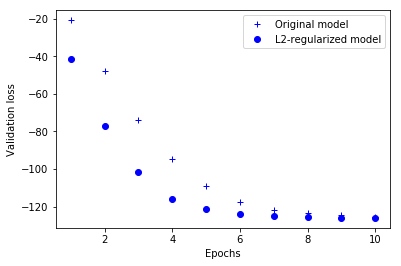

In [215]:
import matplotlib.pyplot as plt
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## Checking weight regularization with Lambda = 0.005

In [216]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.005),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.005),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [217]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [218]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=10,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 5s 542us/step - loss: -16.3553 - acc: 0.0479 - val_loss: -35.2050 - val_acc: 0.0467
Epoch 2/10
8982/8982 [==============================] - 2s 231us/step - loss: -49.0726 - acc: 0.0481 - val_loss: -67.1280 - val_acc: 0.0467
Epoch 3/10
8982/8982 [==============================] - 2s 255us/step - loss: -77.8660 - acc: 0.0481 - val_loss: -91.3162 - val_acc: 0.0467
Epoch 4/10
8982/8982 [==============================] - 2s 212us/step - loss: -98.7123 - acc: 0.0481 - val_loss: -107.8139 - val_acc: 0.0467
Epoch 5/10
8982/8982 [==============================] - 2s 211us/step - loss: -112.4357 - acc: 0.0481 - val_loss: -117.1609 - val_acc: 0.0467
Epoch 6/10
8982/8982 [==============================] - 2s 210us/step - loss: -119.0078 - acc: 0.0481 - val_loss: -121.3648 - val_acc: 0.0467
Epoch 7/10
8982/8982 [==============================] - 2s 204us/step - loss: -121.9872 - acc: 0.0481 - val

## Comparing loss between original model and L2 regularized model with Lambda = 0.005

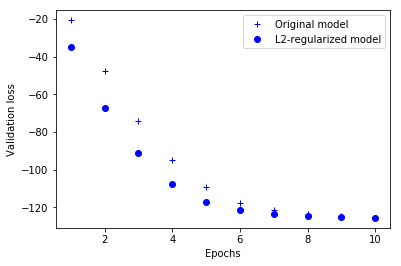

In [219]:
epochs = range(1, 11)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
import matplotlib.pyplot as plt
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## Checking weight regularization with Lambda = 0.0005

In [221]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0005),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0005),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [222]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [223]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=10,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 4s 499us/step - loss: -18.2215 - acc: 0.0477 - val_loss: -41.7764 - val_acc: 0.0467
Epoch 2/10
8982/8982 [==============================] - 2s 201us/step - loss: -58.2041 - acc: 0.0481 - val_loss: -77.9773 - val_acc: 0.0467
Epoch 3/10
8982/8982 [==============================] - 2s 209us/step - loss: -88.5010 - acc: 0.0481 - val_loss: -100.9310 - val_acc: 0.0467
Epoch 4/10
8982/8982 [==============================] - 2s 203us/step - loss: -107.9690 - acc: 0.0481 - val_loss: -115.2836 - val_acc: 0.0467
Epoch 5/10
8982/8982 [==============================] - 2s 223us/step - loss: -118.1409 - acc: 0.0481 - val_loss: -121.1898 - val_acc: 0.0467
Epoch 6/10
8982/8982 [==============================] - 2s 222us/step - loss: -122.1001 - acc: 0.0481 - val_loss: -123.9194 - val_acc: 0.0467
Epoch 7/10
8982/8982 [==============================] - 2s 205us/step - loss: -124.0826 - acc: 0.0481 - v

## Comparing loss between original model and L2 regularized model with Lambda = 0.0005

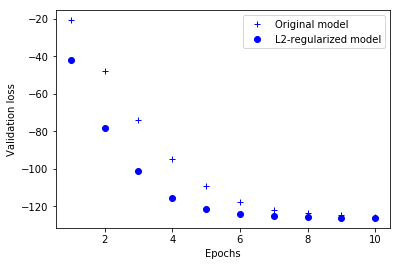

In [224]:
epochs = range(1, 11)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
import matplotlib.pyplot as plt
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()